# Aprendizaje supervisado

Referencia: http://ryancompton.net/assets/ml_cheat_sheet/supervised_learning.html

Se van a ver los siguiente métodos:
* Logistic Regression
* Decision Trees
* Support Vector Machines
* K Nearest neighbors
* Naive Bayes

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [5]:
Xs = []
ys = []

# Low noise, plenty of samples
X0, y0 = sklearn.datasets.make_moons(n_samples = 1000, noise = .05)
Xs.append(X0)
ys.append(y0)

# More noise, plenty of samples
X1, y1 = sklearn.datasets.make_moons(n_samples = 1000, noise = .3)
Xs.append(X1)
ys.append(y1)

# Less noise, few samples
X2, y2 = sklearn.datasets.make_moons(n_samples = 200, noise = .05)
Xs.append(X2)
ys.append(y2)

# More noise, less samples, harder?
X3, y3 = sklearn.datasets.make_moons(n_samples = 200, noise = .3)
Xs.append(X3)
ys.append(y3)


In [16]:
def plotter(model, X, Y, ax, npts=10000):
    """
    Simple way to get a visualization of the decision boundary.
    """
    xs = []
    ys = []
    cs = []
    for _ in range(npts):
        x0spr = max(X[:,0])-min(X[:,0])
        x1spr = max(X[:,1])-min(X[:,1])
        x = np.random.rand()*x0spr + min(X[:,0])
        y = np.random.rand()*x1spr + min(X[:,1])
        xs.append(x)
        ys.append(y)
        cs.append(model.predict([x,y]))
    ax.scatter(xs,ys,c=cs, alpha=.35)
    ax.hold(True)
    ax.scatter(X[:,0],X[:,1],
                 c=list(map(lambda x:'r' if x else 'lime',Y)), 
                 linewidth=0,s=25,alpha=1)
    ax.set_xlim([min(X[:,0]), max(X[:,0])])
    ax.set_ylim([min(X[:,1]), max(X[:,1])])
    return

### Regresión Logística
La regresión logística es el ejemplo canónico de un clasificador **discriminativo**, es decir, aprende la función f: X-> Y directamente de la señal sin atender a como los datos fueron generados).

#### Características generales:
* Paramétrico.
* Discriminativo.
* Similar a las redes neuronales con solo una capa oculta.
* Similar a Gaussian naïve Bayes.

#### Pros:
* Rápido de entrenar
* Rápido de aplicar
* Como en cualquier método discriminativo, no hay asunciones acerca de P(X|Y) durante el entrenamiento
* Robusto a los outliers comparado con LDA. Este último asume una distribución normal en los datos de entrenamiento)

#### Cons:
* Peores resultados que métodos más modernos.
* Ciertas regularizaciones no son triviales.


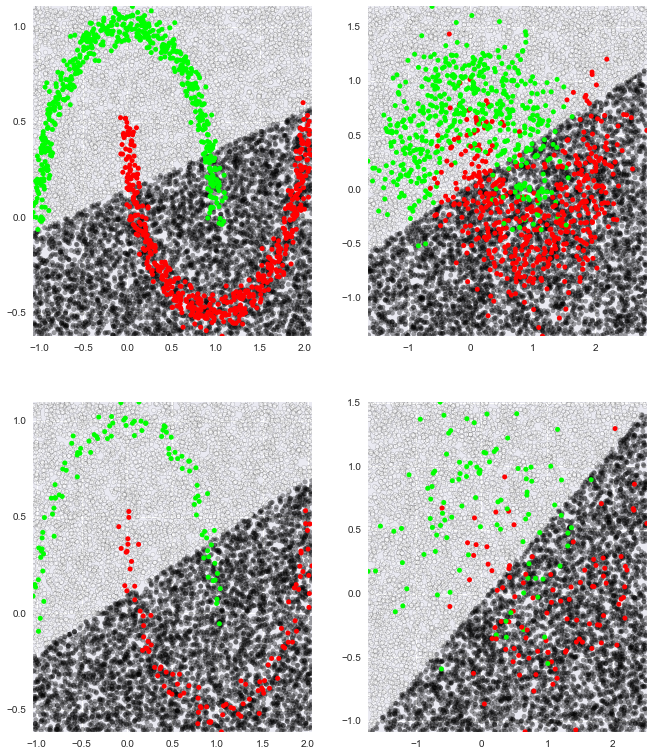

In [17]:
import sklearn.linear_model
classifier = sklearn.linear_model.LogisticRegression()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11,13))
i=0
for X,y in zip(Xs,ys): 
    classifier.fit(X,y)
    plotter(classifier,X,y,ax=axes[i//2,i%2])
    i += 1

### Árboles de decisión

#### Características generales
* Los árboles de decisión se basan en estructuras de datos espaciales (kdtrees).
* Son el ejemplo de "low bias/high variance"
* No paramétricos
* Discriminativos

#### Pros
* Fáciles de interpretar. Pueden ser visualizados.
* Requieren poca preparación de los datos (no hace falta normalizarlos).
* Funcionan tanto con datos numéricos como con categóricos.
* Son un modelo de caja blanca, la estructura del modelo se puede expresar mediante lógica booleana. En contrasten un modelo de caja negra como las redes neuroanesl resultan más difíciles de interpretar.

#### Cons
* **Overfitting**
* ** Unstable** (high variance): pequeñas variaciones en los datos pueden tener resultados muy diferentes
* Encontrar el árbol de decisión óptimo (el más pequeño que minimiza el error) es NP-hard, por lo que hace falta usar heurísticas.
* Datos no balanceados llevan a árboles con un alto bias.

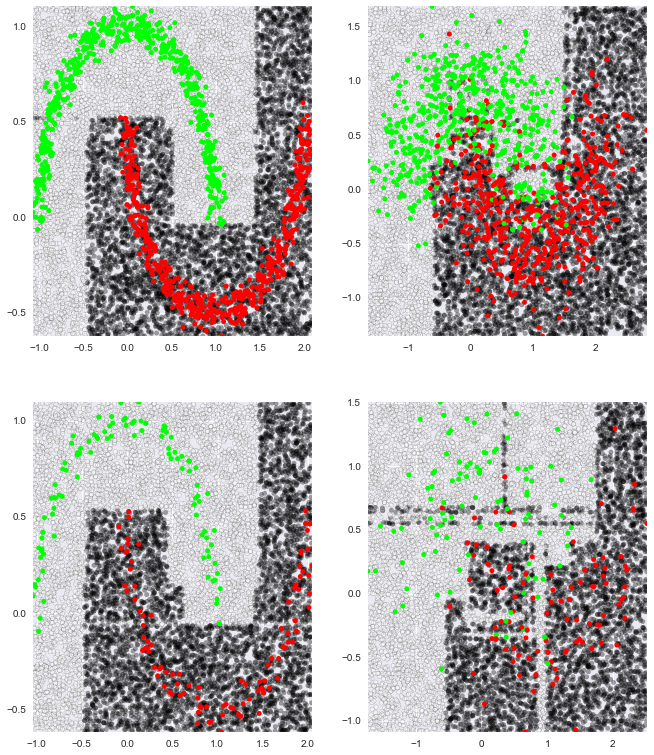

In [19]:
import sklearn.tree
classifier = sklearn.tree.DecisionTreeClassifier()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11,13))
i = 0
for X, y in zip(Xs, ys):
    classifier.fit(X,y)
    plotter(classifier, X, y, ax=axes[i//2,i%2])
    i += 1

### Support Vector Machines

#### Características generales
* No son invariantes a la escala por lo que hay que escalar o estandarizar los datos antes.

#### Pros
* El overfitting tiene un límite teórico.
* Efectivos en espacios con gran cantidad de dimensiones (Texto).
* Efectivos cuando el número de features es mayor que el de muestras.
* Pueden usar un subconjunto de las muestras de entrenamiento en la función de decisión (support vectors), lo que lo hace eficiente en memoria.

#### Cons
* Si el número de features es mucho mayor que el de muestras, el rendimiento es pobre.
* SVM no provee directamente una estimación probabilistica, aunque puede ser calculada usando cross-validation.
* Seleccionar el kernel incorrecto puede llevar a malos resultados.
* Intensivo en memoria.
* Modelo difícil de interpresar.
* Para evitar overfitting hay que probar diferentes valores en el parámetro de regularización.

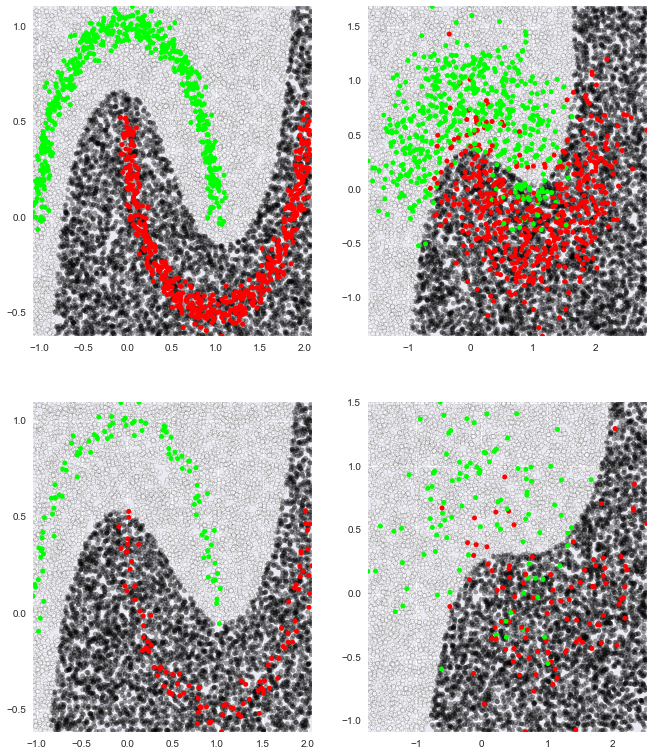

In [20]:
import sklearn.svm
classifier = sklearn.svm.SVC()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11,13))
i = 0
for X, y in zip(Xs, ys):
    classifier.fit(X,y)
    plotter(classifier, X,y, ax = axes[i//2, i%2])
    i += 1

### K nearest neighbors

#### Características generales
* No probabilísticos
* Low bias/high variance

#### Pros
* Fáciles de explicar
* Modelan fronteras no lineales

#### Cons
* **Overfitting**
* La elección de k es crucial
* Debe almacenar todos los datos de entrenamiento
* Hay que decidir una buena métrica de distancia (Mahalanobis, Eucledian,...)


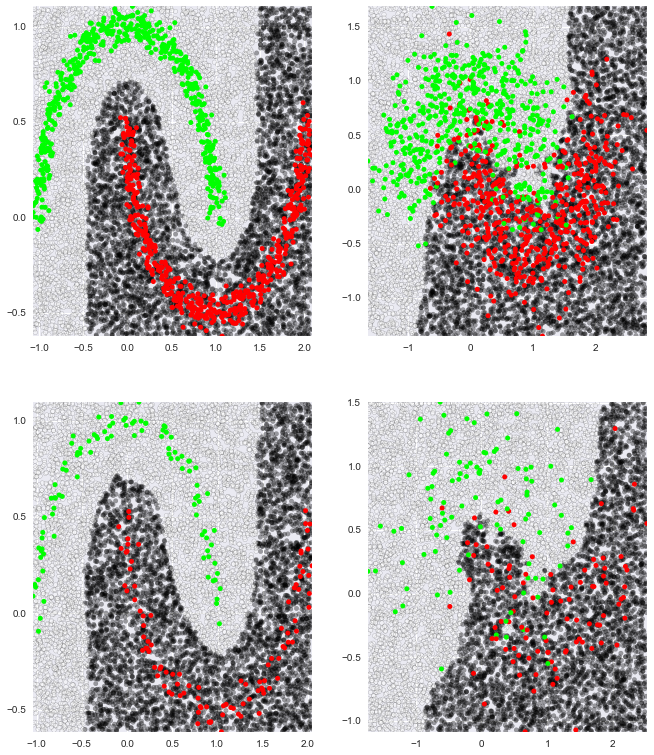

In [22]:
import sklearn.neighbors
classifier = sklearn.neighbors.KNeighborsClassifier()

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(11,13))
i = 0
for X, y in zip(Xs, ys):
    classifier.fit(X,y)
    plotter(classifier, X, y, ax=axes[i//2,i%2])
    i += 1

### Naive Bayes

#### Características generales
* Paramétrico (existen versiones no paramétricas). Normalmente se usan las distribuciones gaussiana o multinomial.
* Lineal
* Similar a la regresión logística con normalización L2.

#### Pros
* High bias/low variance. Bueno cuando se tienen pocas muestras, muchas features y ruido.
* Robusto con datos espureos.
* Rápido de entrenar y aplicar.
* Utilizado tipicamente en el filtrado de spam.

#### Cons
* La indepencia condicional no es siempre usa asunción válida.
* Si los datos no tienen ruido, otros métodos pueden superarlo fácilmente.

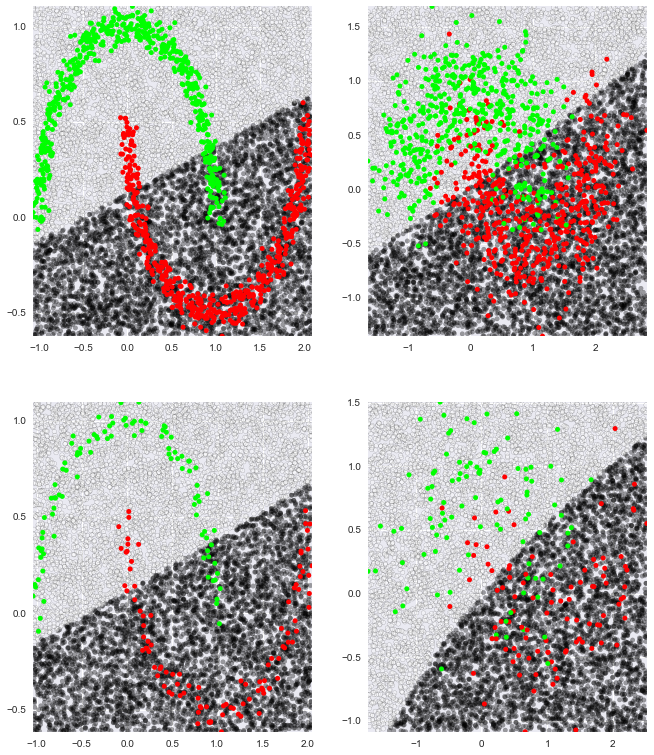

In [25]:
import sklearn.naive_bayes
classifier = sklearn.naive_bayes.GaussianNB()

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize =(11,13))
i = 0
for X, y in zip(Xs, ys):
    classifier.fit(X,y)
    plotter(classifier, X, y, ax = axes[i//2,i%2])
    i +=1

## Elegir un clasificador

Reference: http://blog.echen.me/2011/04/27/choosing-a-machine-learning-classifier/

Si lo único que te importa en una métrica en concreto, lo mejor es probar diferentes algoritmos con distintos parámetros y seleccionar el mejor mediante *cross-validation*. Si por el contrario, buscas un modelo que cumpla otras características, aquí hay unos consejos que pueden resultar de ayuda. De modo general, los algoritmos que suelen conseguir mejores resultados son *Random Forests* y *SVM*. Aunque debido a que estos últimos son intensivos en memoria, difíciles de interpretar y resulta complicado obtener los parámetros adecuados, random forests parece ser el actual poseedor de la corona.


1. Si el tamaño de los datos es pequeño, un clasificador *high bias/low variance* como Naïve Bayes puede ser ventajoso sobre los *low bias/high variance* como KNN, ya que estos últimos tenderán al *overfitting*. Cuando la situación se invierte, y el tamaño del dataset empieza a crecer, los algoritmos "low bias/high variance" empiezan a tomar ventaja gracias a que su mayor flexibilidad les permite modelar patrones más complejos.
2. Si es importante tener un modelo probabilistico (paramétrico): Naïve Bayes y Logistic Regression
3. Si puede haber outliers, y por tanto un modelo paramétrico podría verse afectado: Árbol de Decision
4. Si es importante un modelo fácil de interpretar y visualizar: Árbol de decisión
5. Si interesa una garantía teórica sobre los límites del overfitting: SVM.

## Más sobre aprendizaje automático
http://ml.posthaven.com/machine-learning-done-wrong

### Prácticas a evitar
**1. Tomar la función de coste por defecto como la única alternativa**
Esta función rara vez se alinea con el objetivo del negocio. Una de las consecuencias es que los falso negativos y los falsos positivos toman el mismo peso. Una de las soluciones es aumentar (de manera artificial) el número de muestras del caso extraño/caro para que el algoritmo lo tome más en cuenta.

**2. Utilizar modelos lineales en problemas no-lineales**
A veces se tiende a usar los algorimos más sencillos o conocidos sin tener en cuenta las fuertes asunciones o restricciones que nos imponen a la hora de modelar el problema. Por ejemplo, usar la regresión logística en un problema no líneal puede tener un mal comportamiento. Sin embargo, otros modelos como SVM con el uso de kernels no líneales puede obtener muchos mejores resultados.

**3. Olvidarse de los *outliers* **
Tanto para ignorarlos como para analizarlos con mayor detenimiento hay que razonar el porqué de estos datos. ¿Son relevantes los datos? ¿Son la clave para lograr una generalización correcta?
También es importante saber que algunos algoritmos son más sensibles a los outliers que otros. Por ejemplo, AdaBoost los puede confundir con datos difíciles de aprender y les dé un peso demasiado alto.

**4. Utilizar un algoritmo con tendencia a la alta varianza cuando el número de muestras es menor que el de features**
Utilizar algoritmos muy flexibles como SVM (y sus respectivos kernels) puede causar overfitting. Esto puede ser habitual en el mundo de la medicina.

**5. La regularización L1/L2 sin estandarizar**
Este tipo de técnicas para evitar *overfitting* muy aplicadas en las regresiones logística y lineal, no se deben usar sin haber estandarizado previamente los datos.

**6. Utilizar modelos lineales sin considerar features correlacionadas**
El modelo va a obtener unos coeficientes que, aunque obtendrán un buen resultado en la clasificación, no aportarán ninguna información sobre la verdadera relación de dichas features.

**7. Interpretar el valor de los coeficientes de la regresión logística y líneal como la importancia de la feature**
Por diferentes circunstancias como la correlación entre features o la no estandarización de los datos, los coeficientes puede que no determinen la importancia de la feature dentro del modelo.